In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import empiricaldist
from statadict import parse_stata_dict

In [2]:
dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

stata_dict = parse_stata_dict(dict_file)

In [3]:
import gzip
fp = gzip.open(data_file)

In [4]:
# Convert the file into a Pandas DataFrame............fwf=fixed width file
gss = pd.read_fwf(fp, names=stata_dict.names, colspecs=stata_dict.colspecs)
print(gss.shape)

(64814, 8)


In [5]:
gss.head()

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0


In [6]:
# Distribution of education
print(gss['EDUC'].value_counts().sort_index())

EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [7]:
# the values of 98&99 are special codes for No answer. We will use replace to replace the codes with NaN
educ = gss['EDUC'].replace([98,99],np.nan)
print(educ.value_counts().sort_index())

EDUC
0.0       165
1.0        47
2.0       152
3.0       257
4.0       319
5.0       402
6.0       828
7.0       879
8.0      2724
9.0      2083
10.0     2880
11.0     3743
12.0    19663
13.0     5360
14.0     7160
15.0     2910
16.0     8355
17.0     1967
18.0     2384
19.0      920
20.0     1439
Name: count, dtype: int64


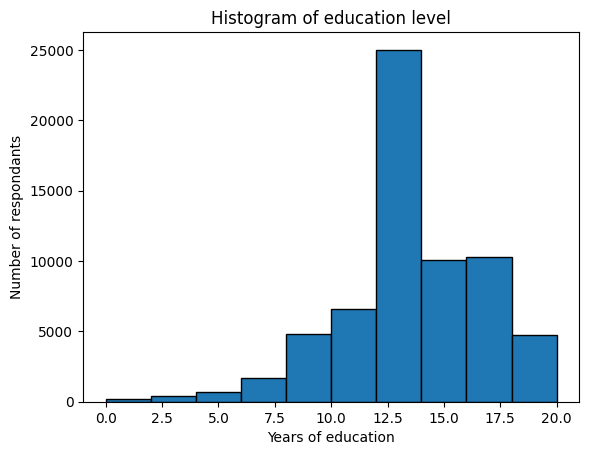

In [8]:
educ.hist(grid=False,edgecolor='black')
plt.xlabel('Years of education')
plt.ylabel('Number of respondants')
plt.title('Histogram of education level')
plt.show()

In [9]:
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ,normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: , dtype: int64
EDUC
18.0    2384
19.0     920
20.0    1439
Name: , dtype: int64
1439


In [10]:
pmf_educ_norm = Pmf.from_seq(educ,normalize =True)
pmf_educ_norm.head()

,probs
EDUC,
0.0,0.002553
1.0,0.000727
2.0,0.002352


In [11]:
pmf_educ_norm[12]  #sample for 12 yearof experience

0.30420656899299164

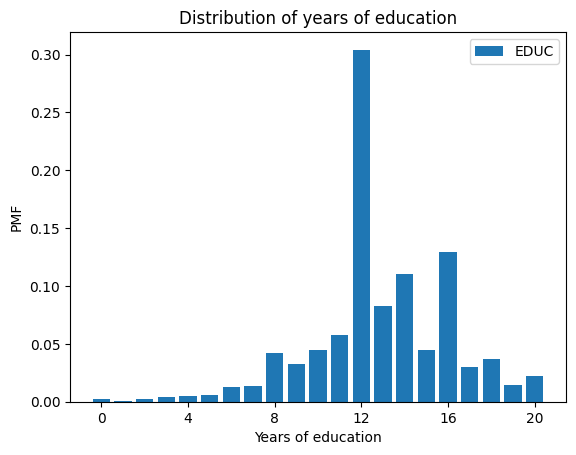

In [12]:
# pmf provides a bar method that plot the value and their probabilities as abar chart
pmf_educ_norm.bar(label = "EDUC")
plt.xlabel('Years of education')
plt.xticks(range(0,21,4))
plt.ylabel('PMF')
plt.title('Distribution of years of education')
plt.legend()
plt.show()

## EXERCISE
Lets look at the YEAR column in the dataframe, which represents the year each respondant was interviewed.
Make an unnormalised PMF for year and display the result. How many respondants were interviewd in 2018?

In [13]:
print(gss['YEAR'].value_counts().sort_index())

YEAR
1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
Name: count, dtype: int64


In [14]:
year = gss['YEAR'].replace([98,99],np.nan)

In [15]:
#Number of respondants in 2018
print("Number of respondants in 2018: ",year[2018])

Number of respondants in 2018:  1973


In [16]:
pmf_year=Pmf.from_seq(year,normalize=False)
pmf_year.head()

,probs
YEAR,
1972,1613
1973,1504
1974,1484


In [17]:
pmf_year[2018]

2348

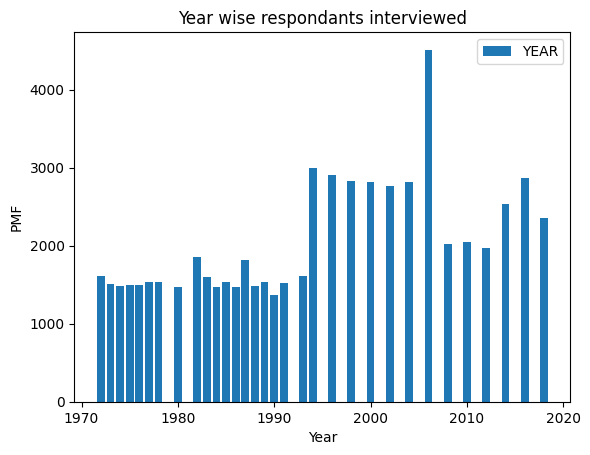

In [18]:
pmf_year.bar(label = "YEAR")
plt.xlabel('Year')
plt.ylabel('PMF')
plt.title('Year wise respondants interviewed')
plt.legend()
plt.show()

# CDF

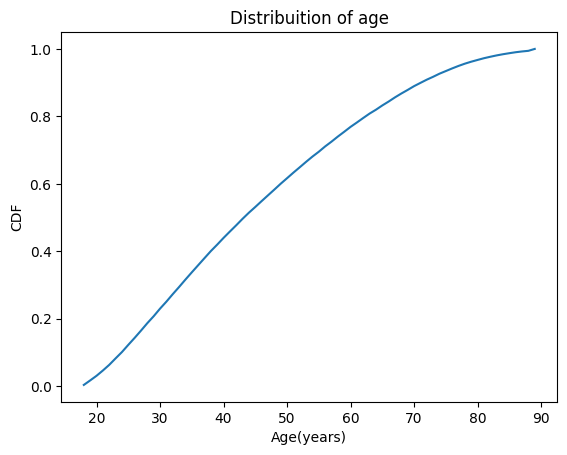

In [19]:
from empiricaldist import Cdf
age = gss['AGE'].replace([98,99],np.nan)

cdf_age = Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('Age(years)')
plt.ylabel('CDF')
plt.title('Distribuition of age')
plt.show()

In [20]:
# we can also obtain cumulative probability upto a certain range,eg age=51
q=51
p=cdf_age(q)
print(np.round(p,2))

0.63


In [21]:
# Inversely we can find the age at a certain value of cumulative probability
p1=0.25
q1=cdf_age.inverse(p1)
print(q1)

#25% of respondants are age31 or less. Another way to say the same thing is 
#"Age 31 is at the 25th percentile ofthis distribuition"


31.0


In [22]:
# We can now use 75th percentile to find IQR
p3=0.75
q3=cdf_age.inverse(p3)
print(q3)

iqr = q3 -q1
print("IQR: ",iqr)

59.0
IQR:  28.0


In [23]:
q1,q3 = np.percentile(cdf_age,[25,75])
q1,q3

(0.35333508809958813, 0.901665995726628)

## EXERCISE
Using cdf_age, compute the fraction of respondants in the GSS dataset that are older than 65

In [24]:
q=65
p=cdf_age(q)
print(np.round(p,2))
print("Respondants older than 65 are: ",np.round((1-p),2))

0.83
Respondants older than 65 are:  0.17


## EXERCISE
The distribution of income in almost every country is long tailed, which means there are a small number of people with very high incoms. In GSS dataset, the column REALINC represents total household income, converted to 1986 dollars. We can get a sense of shape of this distribution by plotting the cdf

In [25]:
from empiricaldist import Cdf
gss1 =gss[gss['YEAR']>=1986]
gss1['inflation'] = gss1['REALINC']*(1+0.08)**32
gss1

/tmp/ipykernel_17697/2235521447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss1['inflation'] = gss1['REALINC']*(1+0.08)**32


,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC,inflation
18586,1986,1,28,14,1,0,2,21659.0,254213.480598
18587,1986,2,54,16,2,0,1,56058.0,657957.398557
18588,1986,3,44,16,2,0,2,28029.0,328978.699278
18589,1986,4,77,14,2,0,2,0.0,0.000000
18590,1986,5,44,14,2,0,8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,12,2,2,0,0.0,0.000000
64810,2018,2345,75,12,2,2,0,14755.0,173180.659597
64811,2018,2346,67,12,2,1,1,45400.0,532863.567992
64812,2018,2347,72,16,1,0,2,24970.0,293074.962396


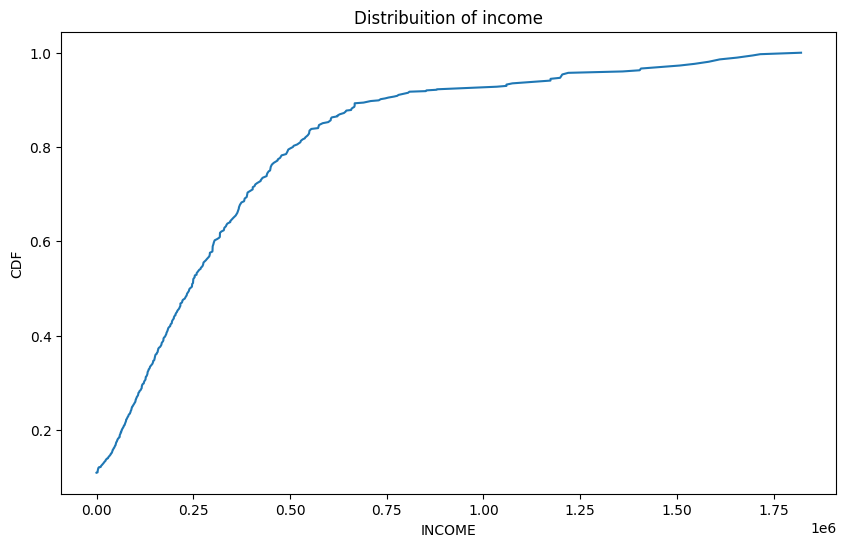

In [26]:
inc = gss1['inflation'].replace([98,99],np.nan)
cdf_inc = Cdf.from_seq(inc)
cdf_inc.plot(figsize=(10,6))
plt.xlabel('INCOME')
plt.ylabel('CDF')
plt.title('Distribuition of income')
plt.show()

In [27]:
# inc = gss['REALINC'].replace([98,99],np.nan)
# cdf_inc = Cdf.from_seq(inc)
# cdf_inc.plot(figsize=(10,6))
# plt.xlabel('INCOME')
# plt.ylabel('CDF')
# plt.title('Distribuition of income')
# plt.show()

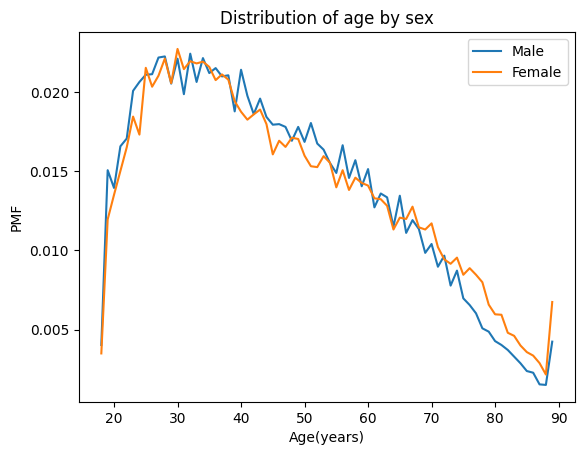

In [28]:
# Now let us comfare CMF and PMF

# create a series fro male and female respondants
male = (gss['SEX']==1)
female = (gss['SEX']==2)

# Select ages
male_age = age[male]
female_age = age[female]

#Plot PMF for each
pmf_male_age = Pmf.from_seq(male_age)
pmf_male_age.plot(label='Male')
pmf_female_age = Pmf.from_seq(female_age)
pmf_female_age.plot(label='Female')

plt.xlabel('Age(years)')
plt.ylabel('PMF')
plt.title('Distribution of age by sex')
plt.legend()
plt.show()

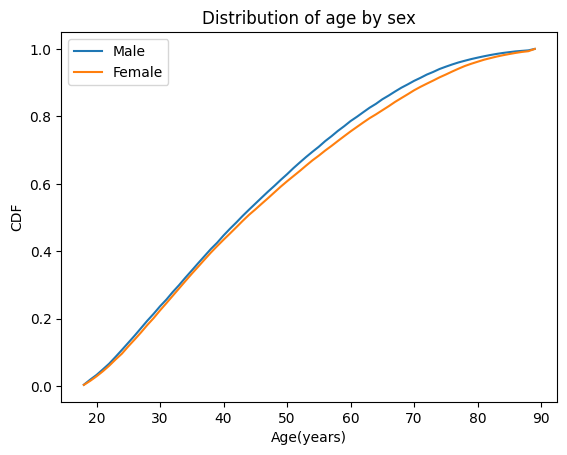

In [29]:
# CDF
cdf_male_age = Cdf.from_seq(male_age)
cdf_male_age.plot(label='Male')
cdf_female_age = Cdf.from_seq(female_age)
cdf_female_age.plot(label='Female')

plt.xlabel('Age(years)')
plt.ylabel('CDF')
plt.title('Distribution of age by sex')
plt.legend()
plt.show()

In [30]:
"""In general, CDFS are smoother than PMFS. Because they smooth out randomness,
we can often get a better view of realdifferences between distributions. In this case, 
the lines are close together until age 40; after that, the CDF is higher for men than women. 
So what does that mean?"""


"""One way to interpret the difference is that the fraction of men below a given age
is generally more than the fraction of women below the same age. For example, about 79% 
of men are 60 or less, compared to 76% of women"""


print(cdf_male_age(60),cdf_female_age(60))

0.785999579566954 0.7552990789035623


In [31]:
# comparing male and female at the 50th percentile
print(cdf_male_age.inverse(0.5),cdf_female_age.inverse(0.5))

43.0 44.0


In [32]:
#wHAT FRACTION OF MEN/WOMEN ARE OVER 80?
print(1-cdf_male_age(80))
print(1-cdf_female_age(80))

0.0258566323313012
0.03806458772611254


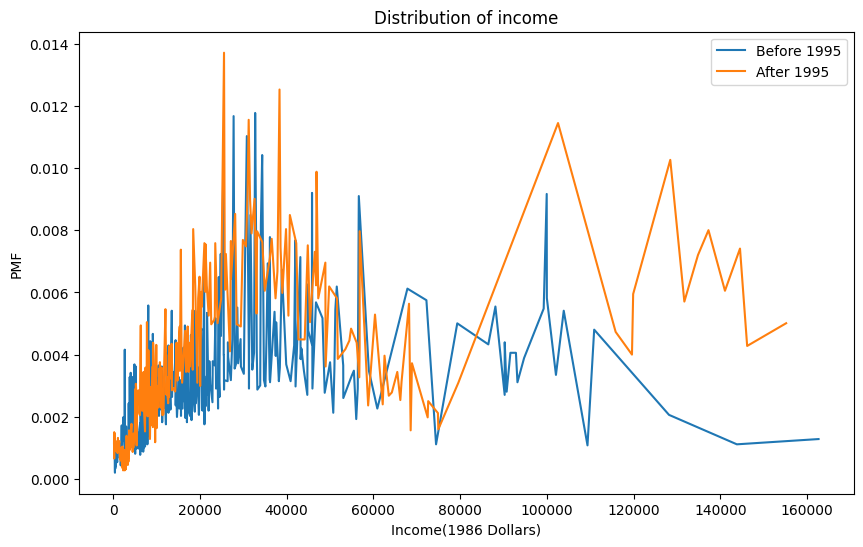

In [39]:
# INCOME ANALYSIS
# The variable REALINC represents household income in 1986 dollars

pre95 = (gss['YEAR']<1995)
post95 = (gss['YEAR']>=1995)

income = gss['REALINC'].replace(0,np.nan)

Pmf.from_seq(income[pre95]).plot(label='Before 1995',figsize=(10,6))
Pmf.from_seq(income[post95]).plot(label='After 1995',figsize=(10,6))

#Plot PMFs
plt.xlabel('Income(1986 Dollars)')
plt.ylabel('PMF')
plt.title("Distribution of income")
plt.legend()
plt.show()


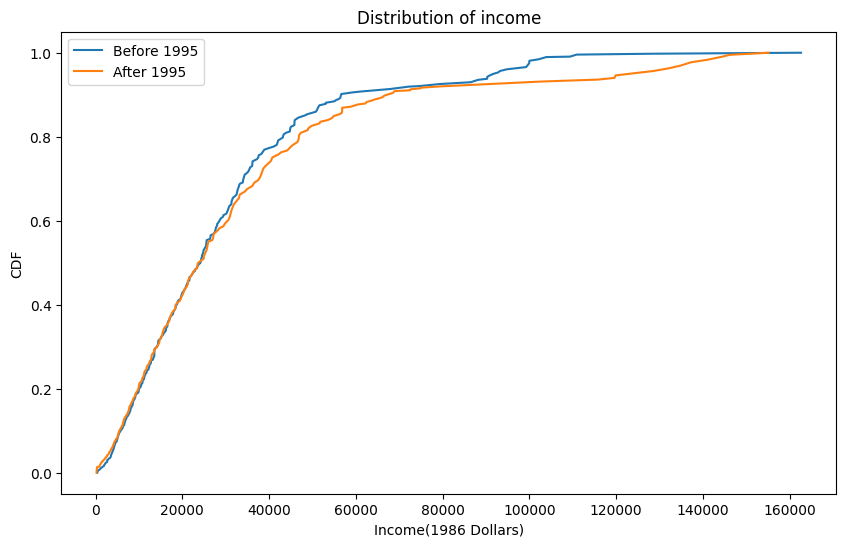

In [40]:
# Again the graph is very noisy : exhibits a significant amount 
#of arandom or unstructured variability or fluctuation

Cdf.from_seq(income[pre95]).plot(label='Before 1995',figsize=(10,6))
Cdf.from_seq(income[post95]).plot(label='After 1995',figsize=(10,6))

#Plot PMFs
plt.xlabel('Income(1986 Dollars)')
plt.ylabel('CDF')
plt.title("Distribution of income")
plt.legend()
plt.show()

# Below $30,000 the CDFS are almost identical; above that, we can see that the post-1995 distribution 
# is shifted to the right. In other words,the fraction of people with high incomes is 
# about the same, but the income of high earners has increased..

## EXERCISE
In the previous figure, the dollar amounts are big enough that the labels on the x axis are crowded. Improve the figure by expressing income in 1000s of dollars (and update the x label accordingly)

# Kernel Density Estimation or Probability Density Function

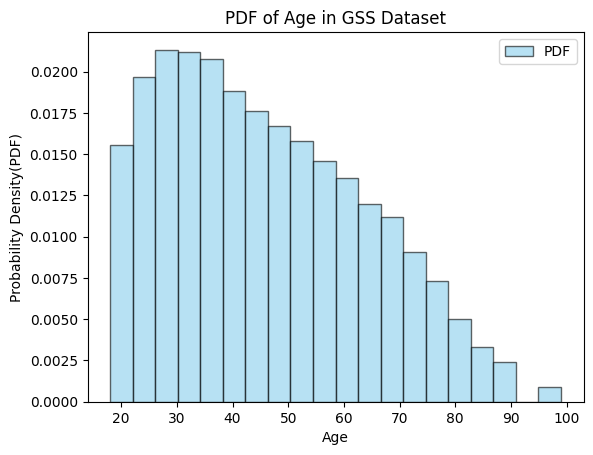

In [43]:
age_data = gss['AGE']

#create a histogram to visualize pdf
plt.hist(age_data,bins=20,density=True,alpha=0.6,color='skyblue',label='PDF',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Probability Density(PDF)')
plt.title("PDF of Age in GSS Dataset")
plt.legend()
plt.show()

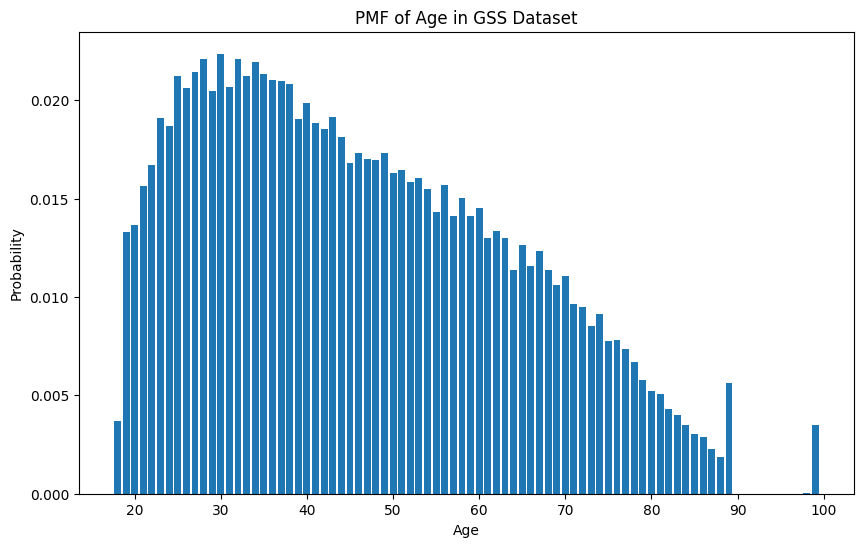

In [52]:
# Correspondinf PMF

pmf = age_data.value_counts(normalize=True).sort_index()
plt.figure(figsize=(10,6))
plt.bar(pmf.index,pmf.values)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title("PMF of Age in GSS Dataset")
# plt.xticks(rotation=90)
plt.show()